# Regression Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("global_laptop_selling_data.xlsx")

# Data Analysis

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [5]:
df.shape

(1303, 13)

In [6]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [7]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [8]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [9]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [10]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [12]:
row_index = 0
row_values = df.iloc[row_index]
for column_name, value in row_values.items():
    print(column_name, ":", value)

laptop_ID : 1
Company : Apple
Product : MacBook Pro
TypeName : Ultrabook
Inches : 13.3
ScreenResolution : IPS Panel Retina Display 2560x1600
Cpu : Intel Core i5 2.3GHz
Ram : 8GB
Memory : 128GB SSD
Gpu : Intel Iris Plus Graphics 640
OpSys : macOS
Weight : 1.37kg
Price_euros : 1339.69


#### Copy Of Dataframe for Additional Use :

In [13]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()
df8 = df.copy()
df9 = df.copy()
df10 = df.copy()

# Data Cleaning

#### Remove Irrelevant Columns :

In [14]:
df.drop(['laptop_ID'], axis=1, inplace = True)

In [15]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### Find and Remove/Fill in the Missing Rows :

In [16]:
df.isna().any()

Company             False
Product             False
TypeName            False
Inches              False
ScreenResolution    False
Cpu                 False
Ram                 False
Memory              False
Gpu                 False
OpSys               False
Weight              False
Price_euros         False
dtype: bool

In [17]:
df.fillna(0, inplace=True)

#### Convert Data Types :

In [18]:
df['Inches'] = df['Inches'].astype(float)
df['Price_euros'] = df['Price_euros'].astype(float)

In [19]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [20]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

#### Extract Useful Information :

##### ScreenResolution

In [21]:
df['ScreenType'] = df['ScreenResolution'].str.extract(r'([A-Za-z\s]+)').fillna('Null')
df['ResolutionWidth'] = df['ScreenResolution'].str.extract(r'(\d+)x').fillna('0')
df['ResolutionHeight'] = df['ScreenResolution'].str.extract(r'x(\d+)').fillna('0')

In [22]:
df['ResolutionWidth'] = pd.to_numeric(df['ResolutionWidth'])
df['ResolutionHeight'] = pd.to_numeric(df['ResolutionHeight'])

In [23]:
df.drop(['ScreenResolution'], axis=1, inplace=True)

In [24]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenType,ResolutionWidth,ResolutionHeight
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,x,1440,900
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600


##### CPU

In [25]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [26]:
df['CPU Brand'] = df['Cpu'].str.extract(r'([A-Za-z\s]+)').astype(str)
df['CPU Model'] = df['Cpu'].str.extract(r'(\w+\d+-?\w*)').astype(str)
df['CPU ClockSpeed'] = df['Cpu'].str.extract(r'([\d.]+)GHz').astype(float)

In [27]:
df.drop(['Cpu'], axis=1, inplace=True)

In [28]:
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed
0,Apple,MacBook Pro,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600,Intel Core i,i5,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,x,1440,900,Intel Core i,i5,1.8
2,HP,250 G6,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080,Intel Core i,i5,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800,Intel Core i,i7,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600,Intel Core i,i5,3.1


##### GPU

In [29]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      282
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: count, Length: 106, dtype: int64

In [30]:
#Skipped Data Cleaning in Gpu because it is not so necessary, I considered performing encoding for this. 

##### RAM

In [31]:
if df['Ram'].dtype == int or df['Ram'].dtype == float:
    df['Ram'] = df['Ram'].astype(int)
else:
    df['Ram'] = df['Ram'].str.extract('(\d+)').astype(int)

df.rename(columns={'Ram': 'RamGB'}, inplace=True)

In [32]:
df.head()

,Company,Product,TypeName,Inches,RamGB,Memory,Gpu,OpSys,Weight,Price_euros,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600,Intel Core i,i5,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,x,1440,900,Intel Core i,i5,1.8
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080,Intel Core i,i5,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800,Intel Core i,i7,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600,Intel Core i,i5,3.1


In [33]:
df['RamGB'].value_counts()

RamGB
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

##### Memory

In [34]:
memory_regex = r'(\d+\.?\d*)\s*(\w+)'
memory_conversion = {'TB': 1024, 'GB': 1, 'MB': 1 / 1024}

def convert_memory_to_gb(memory):
    total_gb = 0
    for size, unit in re.findall(memory_regex, memory):
        size = float(size)
        if unit in memory_conversion:
            size *= memory_conversion[unit]
        total_gb += size
    return total_gb

df['MemoryGB'] = df['Memory'].apply(convert_memory_to_gb)

In [35]:
df.drop(['Memory'], axis=1, inplace=True)

In [36]:
df.head()

,Company,Product,TypeName,Inches,RamGB,Gpu,OpSys,Weight,Price_euros,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed,MemoryGB
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,IPS Panel Retina Display,2560,1600,Intel Core i,i5,2.3,128.0
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,x,1440,900,Intel Core i,i5,1.8,128.0
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,575.00,Full HD,1920,1080,Intel Core i,i5,2.5,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,IPS Panel Retina Display,2880,1800,Intel Core i,i7,2.7,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,IPS Panel Retina Display,2560,1600,Intel Core i,i5,3.1,256.0


In [37]:
df['MemoryGB'].value_counts()

MemoryGB
256.0     420
1024.0    248
500.0     132
512.0     122
1152.0     94
128.0      81
1280.0     74
32.0       45
2048.0     19
64.0       16
1536.0     15
2304.0     10
16.0       10
180.0       5
2560.0      3
756.0       2
2176.0      2
768.0       1
1088.0      1
240.0       1
8.0         1
508.0       1
Name: count, dtype: int64

#### Clean and Normalize Data :

In [38]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [39]:
df.head()

,Company,Product,TypeName,Inches,RamGB,Gpu,OpSys,Weight,Price_euros,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed,MemoryGB
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,IPS Panel Retina Display,2560,1600,Intel Core i,i5,2.3,128.0
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,x,1440,900,Intel Core i,i5,1.8,128.0
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,Full HD,1920,1080,Intel Core i,i5,2.5,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,IPS Panel Retina Display,2880,1800,Intel Core i,i7,2.7,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,IPS Panel Retina Display,2560,1600,Intel Core i,i5,3.1,256.0


#### Rename Column :

In [40]:
df.rename(columns={'Price_euros': 'PriceEuros'}, inplace=True)
df.rename(columns={'Gpu': 'GPU'}, inplace=True)

In [41]:
df.head()

,Company,Product,TypeName,Inches,RamGB,GPU,OpSys,Weight,PriceEuros,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed,MemoryGB
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,IPS Panel Retina Display,2560,1600,Intel Core i,i5,2.3,128.0
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,x,1440,900,Intel Core i,i5,1.8,128.0
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,Full HD,1920,1080,Intel Core i,i5,2.5,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,IPS Panel Retina Display,2880,1800,Intel Core i,i7,2.7,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,IPS Panel Retina Display,2560,1600,Intel Core i,i5,3.1,256.0


In [42]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'RamGB', 'GPU', 'OpSys',
       'Weight', 'PriceEuros', 'ScreenType', 'ResolutionWidth',
       'ResolutionHeight', 'CPU Brand', 'CPU Model', 'CPU ClockSpeed',
       'MemoryGB'],
      dtype='object')

#### Columns in Desired Order :

In [43]:
desired_order = ['Company', 'Product', 'TypeName', 'Inches', 'ScreenType', 'ResolutionWidth', 'ResolutionHeight', 'CPU Brand', 'CPU Model',
       'CPU ClockSpeed', 'GPU', 'RamGB', 'MemoryGB', 'OpSys', 'Weight', 'PriceEuros']
df = df.reindex(columns=desired_order)

In [44]:
df.head()

,Company,Product,TypeName,Inches,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed,GPU,RamGB,MemoryGB,OpSys,Weight,PriceEuros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display,2560,1600,Intel Core i,i5,2.3,Intel Iris Plus Graphics 640,8,128.0,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,x,1440,900,Intel Core i,i5,1.8,Intel HD Graphics 6000,8,128.0,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD,1920,1080,Intel Core i,i5,2.5,Intel HD Graphics 620,8,256.0,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display,2880,1800,Intel Core i,i7,2.7,AMD Radeon Pro 455,16,512.0,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display,2560,1600,Intel Core i,i5,3.1,Intel Iris Plus Graphics 650,8,256.0,macOS,1.37,1803.60


### Data Analysis After Cleaning :

In [45]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenType',
       'ResolutionWidth', 'ResolutionHeight', 'CPU Brand', 'CPU Model',
       'CPU ClockSpeed', 'GPU', 'RamGB', 'MemoryGB', 'OpSys', 'Weight',
       'PriceEuros'],
      dtype='object')

In [46]:
df.nunique()

Company              19
Product             618
TypeName              6
Inches               18
ScreenType           10
ResolutionWidth      13
ResolutionHeight     10
CPU Brand            19
CPU Model            50
CPU ClockSpeed       25
GPU                 106
RamGB                 9
MemoryGB             22
OpSys                 9
Weight              171
PriceEuros          791
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenType        1303 non-null   object 
 5   ResolutionWidth   1303 non-null   int64  
 6   ResolutionHeight  1303 non-null   int64  
 7   CPU Brand         1303 non-null   object 
 8   CPU Model         1303 non-null   object 
 9   CPU ClockSpeed    1303 non-null   float64
 10  GPU               1303 non-null   object 
 11  RamGB             1303 non-null   int32  
 12  MemoryGB          1303 non-null   float64
 13  OpSys             1303 non-null   object 
 14  Weight            1303 non-null   float64
 15  PriceEuros        1303 non-null   float64
dtypes: float64(5), int32(1), int64(2), object(

In [48]:
row_index = 0
row_values = df.iloc[row_index]
for column_name, value in row_values.items():
    print(column_name, ":", value)

Company : Apple
Product : MacBook Pro
TypeName : Ultrabook
Inches : 13.3
ScreenType : IPS Panel Retina Display 
ResolutionWidth : 2560
ResolutionHeight : 1600
CPU Brand : Intel Core i
CPU Model : i5
CPU ClockSpeed : 2.3
GPU : Intel Iris Plus Graphics 640
RamGB : 8
MemoryGB : 128.0
OpSys : macOS
Weight : 1.37
PriceEuros : 1339.69


# Save Cleaned Model :

In [49]:
df.to_csv('Cleaned_Laptop_Selling_Data.csv', index=False)

In [50]:
df.to_excel('Cleaned_Laptop_Selling_Data.xlsx', index=False)

# Load the Saved Model & Analyze Data :

In [51]:
df = pd.read_excel('Cleaned_Laptop_Selling_Data.xlsx')

In [52]:
df.head()

,Company,Product,TypeName,Inches,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed,GPU,RamGB,MemoryGB,OpSys,Weight,PriceEuros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display,2560,1600,Intel Core i,i5,2.3,Intel Iris Plus Graphics 640,8,128,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,x,1440,900,Intel Core i,i5,1.8,Intel HD Graphics 6000,8,128,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD,1920,1080,Intel Core i,i5,2.5,Intel HD Graphics 620,8,256,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display,2880,1800,Intel Core i,i7,2.7,AMD Radeon Pro 455,16,512,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display,2560,1600,Intel Core i,i5,3.1,Intel Iris Plus Graphics 650,8,256,macOS,1.37,1803.60


In [53]:
df.shape

(1303, 16)

In [54]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenType          0
ResolutionWidth     0
ResolutionHeight    0
CPU Brand           0
CPU Model           4
CPU ClockSpeed      0
GPU                 0
RamGB               0
MemoryGB            0
OpSys               0
Weight              0
PriceEuros          0
dtype: int64

In [55]:
df.nunique()

Company              19
Product             618
TypeName              6
Inches               18
ScreenType           10
ResolutionWidth      13
ResolutionHeight     10
CPU Brand            19
CPU Model            49
CPU ClockSpeed       25
GPU                 106
RamGB                 9
MemoryGB             22
OpSys                 9
Weight              171
PriceEuros          791
dtype: int64

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.60,18.4
ResolutionWidth,1303.0,1894.784344,494.641028,1366.00,1600.0,1920.00,1920.00,3840.0
ResolutionHeight,1303.0,1070.830391,284.519410,768.00,900.0,1080.00,1080.00,2160.0
CPU ClockSpeed,1303.0,2.298772,0.506340,0.90,2.0,2.50,2.70,3.6
RamGB,1303.0,8.382195,5.084665,2.00,4.0,8.00,8.00,64.0
MemoryGB,1303.0,620.095165,479.733442,8.00,256.0,500.00,1024.00,2560.0
Weight,1303.0,2.038734,0.665475,0.69,1.5,2.04,2.30,4.7
PriceEuros,1303.0,1123.686992,699.009043,174.00,599.0,977.00,1487.88,6099.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenType        1303 non-null   object 
 5   ResolutionWidth   1303 non-null   int64  
 6   ResolutionHeight  1303 non-null   int64  
 7   CPU Brand         1303 non-null   object 
 8   CPU Model         1299 non-null   object 
 9   CPU ClockSpeed    1303 non-null   float64
 10  GPU               1303 non-null   object 
 11  RamGB             1303 non-null   int64  
 12  MemoryGB          1303 non-null   int64  
 13  OpSys             1303 non-null   object 
 14  Weight            1303 non-null   float64
 15  PriceEuros        1303 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory 

# Label Encoding :

#### Categorical Variables into Numerical Representation :

In [58]:
categorical_columns1 = df.select_dtypes(include=object).columns
categorical_columns1

Index(['Company', 'Product', 'TypeName', 'ScreenType', 'CPU Brand',
       'CPU Model', 'GPU', 'OpSys'],
      dtype='object')

In [59]:
for column in df.columns:
    if df[column].dtype == "object":
        unique_values = df[column].unique()
        print(f"The unique values of column {column} are: {unique_values}")

The unique values of column Company are: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
The unique values of column Product are: ['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' 'VivoBook

In [60]:
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.columns:
    if not is_numeric_dtype(df[col]):
        df[col] = le.fit_transform(df[col])

df.head()

,Company,Product,TypeName,Inches,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed,GPU,RamGB,MemoryGB,OpSys,Weight,PriceEuros
0,1,300,4,13.3,4,2560,1600,13,41,2.3,56,8,128,8,1.37,1339.69
1,1,301,4,13.3,9,1440,900,13,41,1.8,50,8,128,8,1.34,898.94
2,7,50,3,15.6,0,1920,1080,13,41,2.5,52,8,256,4,1.86,575.00
3,1,300,4,15.4,4,2880,1800,13,42,2.7,8,16,512,8,1.83,2537.45
4,1,300,4,13.3,4,2560,1600,13,41,3.1,57,8,256,8,1.37,1803.60


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   int32  
 1   Product           1303 non-null   int32  
 2   TypeName          1303 non-null   int32  
 3   Inches            1303 non-null   float64
 4   ScreenType        1303 non-null   int32  
 5   ResolutionWidth   1303 non-null   int64  
 6   ResolutionHeight  1303 non-null   int64  
 7   CPU Brand         1303 non-null   int32  
 8   CPU Model         1303 non-null   int32  
 9   CPU ClockSpeed    1303 non-null   float64
 10  GPU               1303 non-null   int32  
 11  RamGB             1303 non-null   int64  
 12  MemoryGB          1303 non-null   int64  
 13  OpSys             1303 non-null   int32  
 14  Weight            1303 non-null   float64
 15  PriceEuros        1303 non-null   float64
dtypes: float64(4), int32(8), int64(4)
memory u

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Company,1303.0,6.442824,4.084128,0.00,4.0,7.00,10.00,18.0
Product,1303.0,308.207214,171.887833,0.00,182.5,291.00,455.50,617.0
TypeName,1303.0,2.582502,1.245231,0.00,1.5,3.00,3.00,5.0
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.60,18.4
ScreenType,1303.0,3.161934,3.725698,0.00,0.0,2.00,8.00,9.0
ResolutionWidth,1303.0,1894.784344,494.641028,1366.00,1600.0,1920.00,1920.00,3840.0
ResolutionHeight,1303.0,1070.830391,284.519410,768.00,900.0,1080.00,1080.00,2160.0
CPU Brand,1303.0,12.033768,3.043529,0.00,13.0,13.00,13.00,18.0
CPU Model,1303.0,39.012279,7.042214,0.00,40.0,41.00,42.00,49.0
CPU ClockSpeed,1303.0,2.298772,0.506340,0.90,2.0,2.50,2.70,3.6


# Data Visualization :

### Scatter Plot :

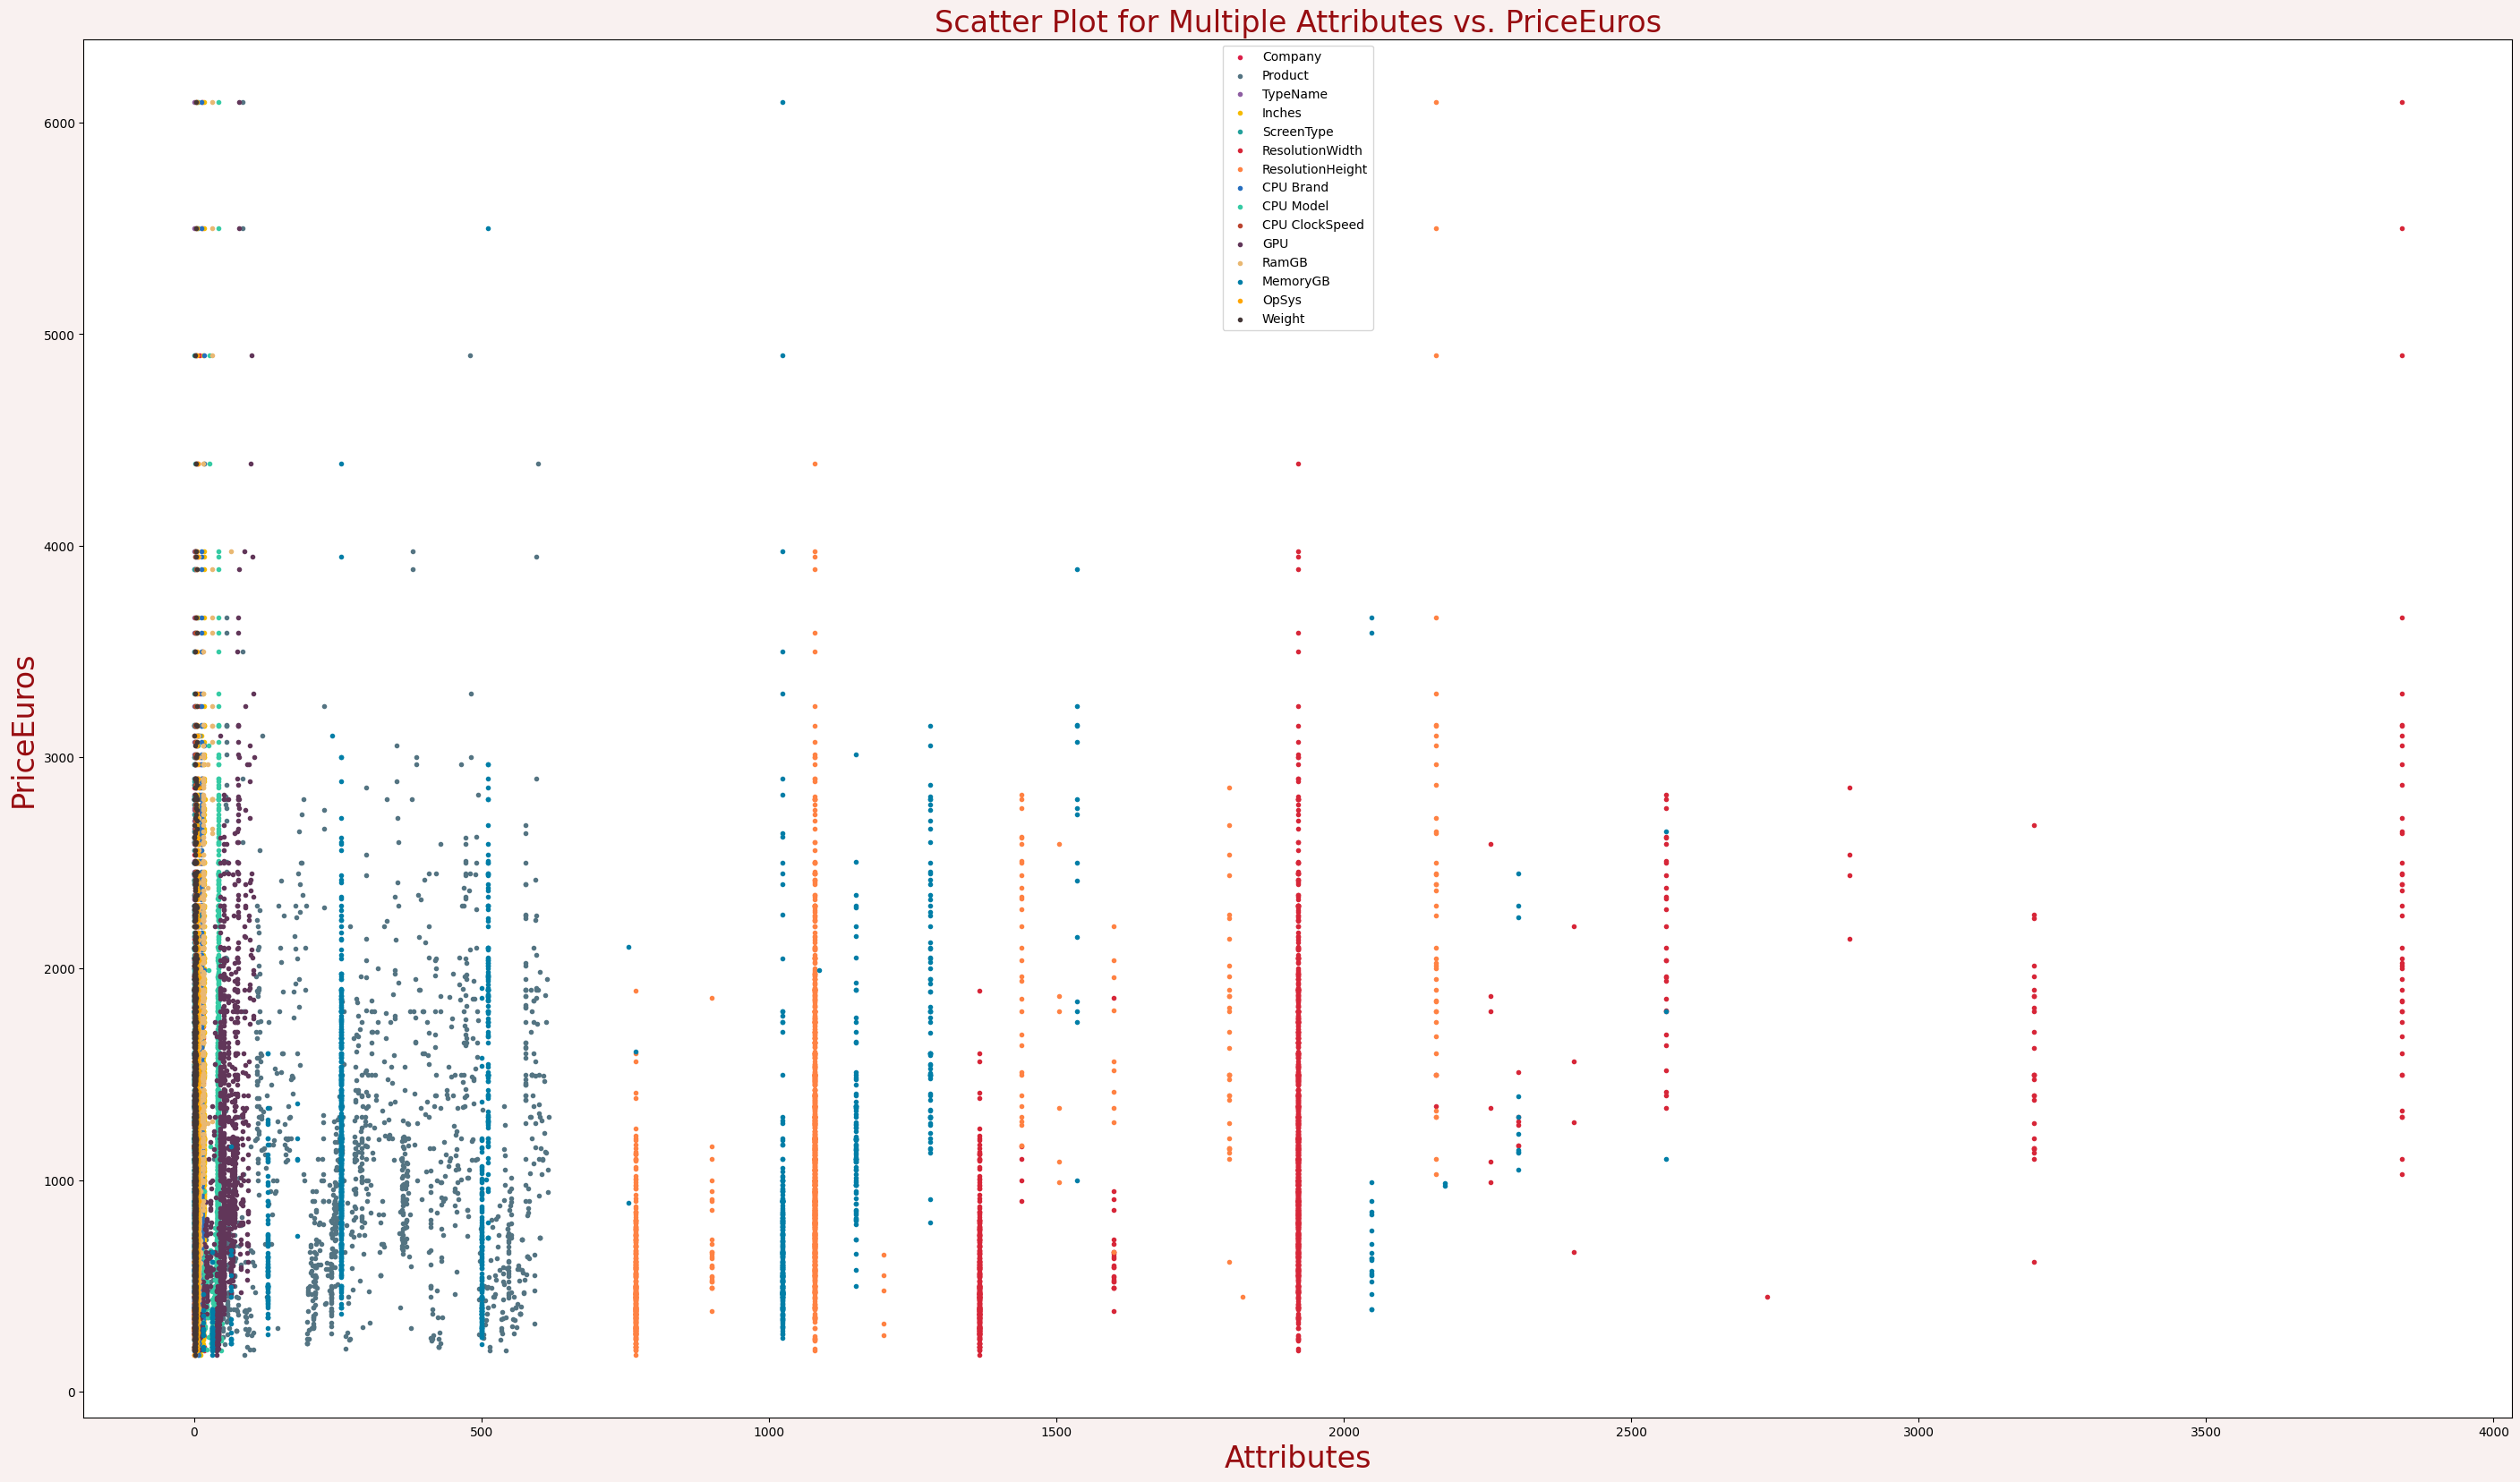

In [63]:
import matplotlib.pyplot as plt

columns = ['Company', 'Product', 'TypeName', 'Inches', 'ScreenType', 'ResolutionWidth', 'ResolutionHeight',
           'CPU Brand', 'CPU Model', 'CPU ClockSpeed', 'GPU', 'RamGB', 'MemoryGB', 'OpSys', 'Weight']
target_column = 'PriceEuros'

plt.figure(figsize=(35, 20), facecolor='#F9F1F0')

colors = ['#DB1F48', '#547482', '#8E5EA2', '#F5BB00', '#24A19C', '#D72638',
          '#FF8243', '#276FBF', '#36CBA4', '#BB4430', '#613659', '#E9B872',
          '#007EA7', '#FFA600', '#443737', '#FFB997']

for i, column in enumerate(columns):
    plt.scatter(df[column], df[target_column], marker='.', color=colors[i], label=column)

plt.xlabel("Attributes", color="#970C10", fontsize=24)
plt.ylabel("PriceEuros", color="#970C10", fontsize=24)
plt.title("Scatter Plot for Multiple Attributes vs. PriceEuros", color="#970C10", fontsize=24)

plt.legend()
plt.show()

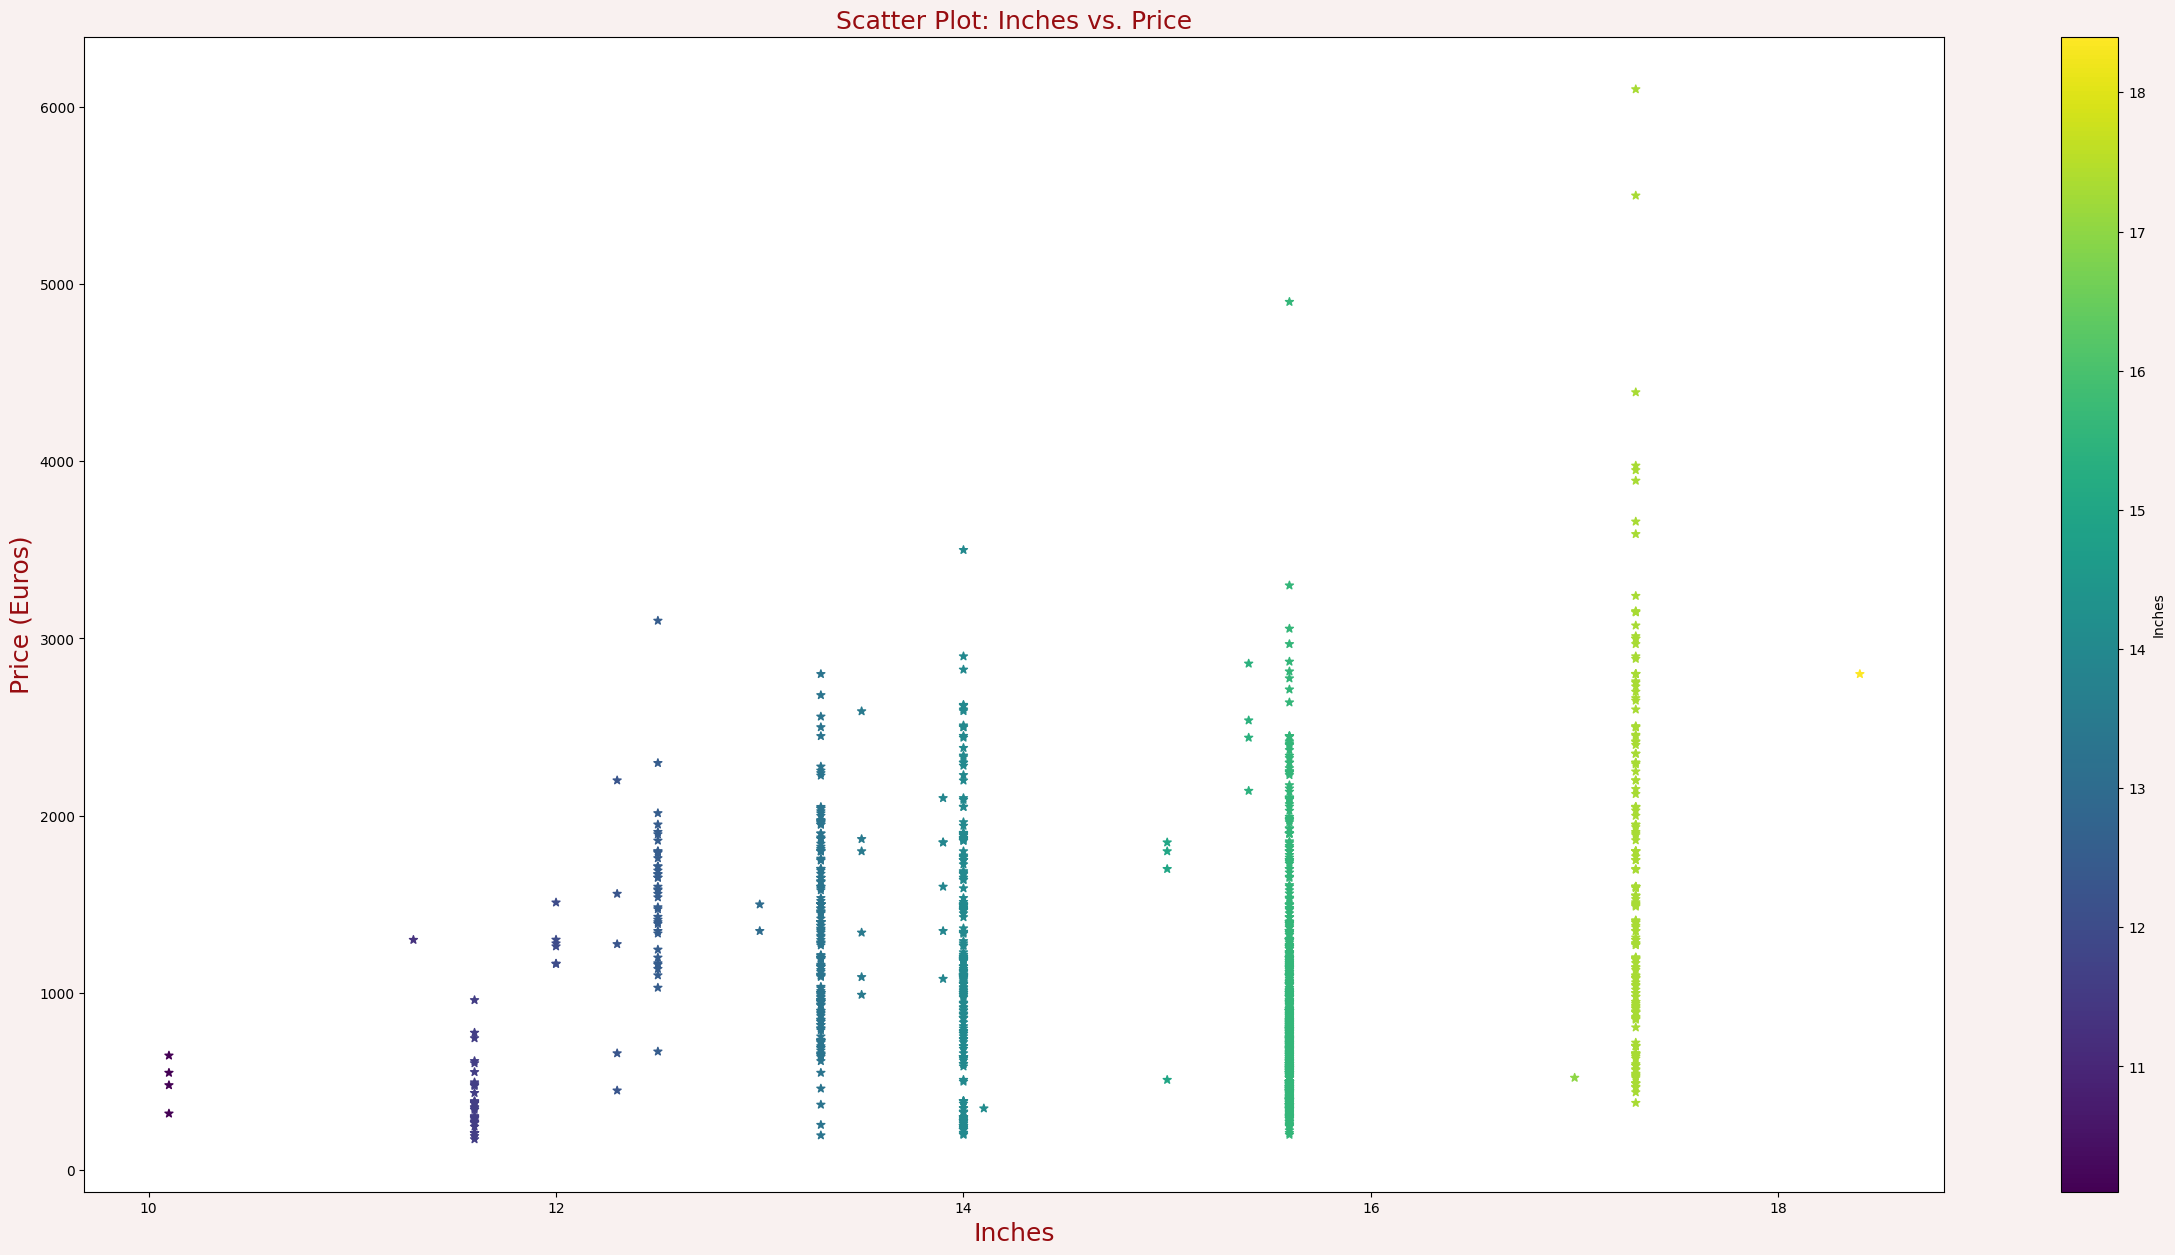

In [64]:
cmap = plt.cm.get_cmap('viridis')

plt.figure(figsize=(30, 15), facecolor='#F9F1F0')
plt.scatter(df['Inches'], df['PriceEuros'], marker='*', c=df['Inches'], cmap=cmap)
plt.xlabel("Inches", color="#970C10", fontsize=18)
plt.ylabel("Price (Euros)", color="#970C10", fontsize=18)
plt.title("Scatter Plot: Inches vs. Price", color="#970C10", fontsize=18)
plt.colorbar(label="Inches")
plt.show()

### Heatmap :

In [65]:
df.corr()

,Company,Product,TypeName,Inches,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed,GPU,RamGB,MemoryGB,OpSys,Weight,PriceEuros
Company,1.000000,0.067234,-0.007718,-0.085784,-0.089061,0.056234,0.053307,0.042419,0.091700,0.140119,0.030332,0.046508,-0.090839,0.134290,-0.129610,0.140371
Product,0.067234,1.000000,0.065594,-0.218974,-0.034736,0.162045,0.162373,0.178003,0.172612,-0.047634,0.103462,0.019916,-0.200205,0.120562,-0.249029,0.139289
TypeName,-0.007718,0.065594,1.000000,-0.077428,0.118715,-0.084792,-0.069762,-0.028702,-0.061775,-0.088179,-0.197440,-0.242862,-0.238240,0.085223,-0.267002,-0.127313
Inches,-0.085784,-0.218974,-0.077428,1.000000,-0.096683,-0.071245,-0.095404,0.033288,0.030535,0.307870,0.198259,0.237993,0.538059,0.034528,0.827631,0.068197
ScreenType,-0.089061,-0.034736,0.118715,-0.096683,1.000000,-0.348073,-0.329544,-0.188240,-0.250304,-0.288822,-0.216917,-0.297208,-0.095029,-0.143309,-0.088697,-0.320468
ResolutionWidth,0.056234,0.162045,-0.084792,-0.071245,-0.348073,1.000000,0.994219,0.174596,0.149561,0.183548,0.232606,0.433121,0.070018,0.152301,-0.032880,0.556529
ResolutionHeight,0.053307,0.162373,-0.069762,-0.095404,-0.329544,0.994219,1.000000,0.170958,0.152773,0.169668,0.222425,0.424437,0.055468,0.152991,-0.053846,0.552809
CPU Brand,0.042419,0.178003,-0.028702,0.033288,-0.188240,0.174596,0.170958,1.000000,0.733156,0.098818,0.435053,0.211286,0.079435,0.091023,0.059336,0.307024
CPU Model,0.091700,0.172612,-0.061775,0.030535,-0.250304,0.149561,0.152773,0.733156,1.000000,0.212479,0.368484,0.216209,0.071481,0.156134,0.050646,0.268247
CPU ClockSpeed,0.140119,-0.047634,-0.088179,0.307870,-0.288822,0.183548,0.169668,0.098818,0.212479,1.000000,0.287852,0.368000,0.242132,0.214938,0.320434,0.430293


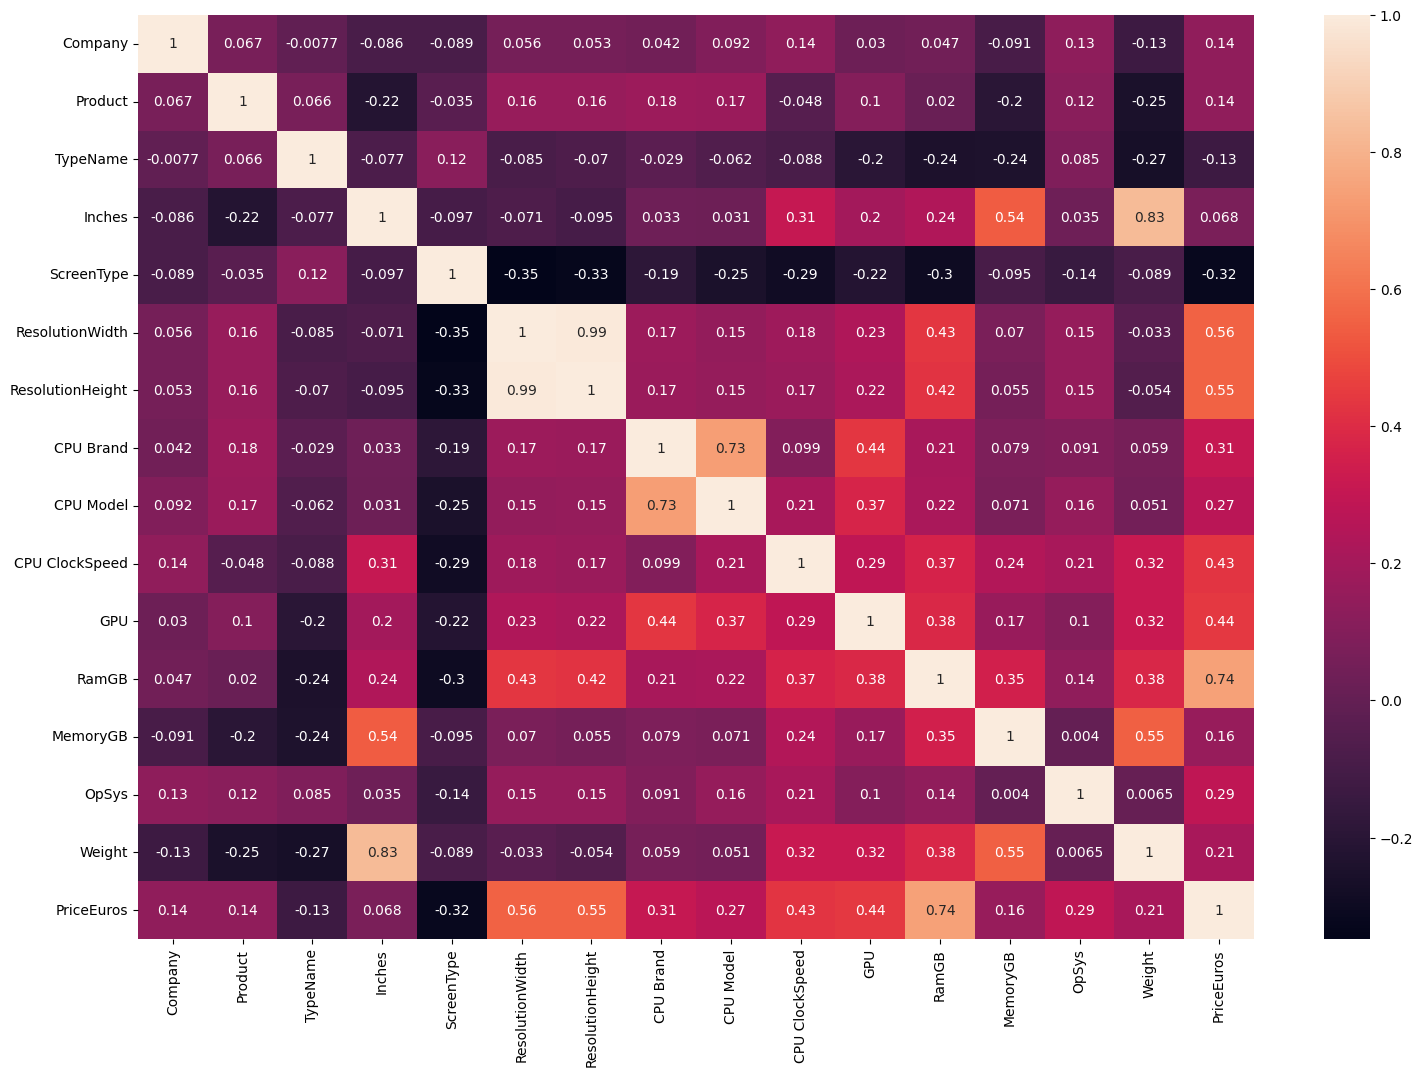

In [66]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)
plt.savefig("Laptop Selling.png")

### Bar Plot :

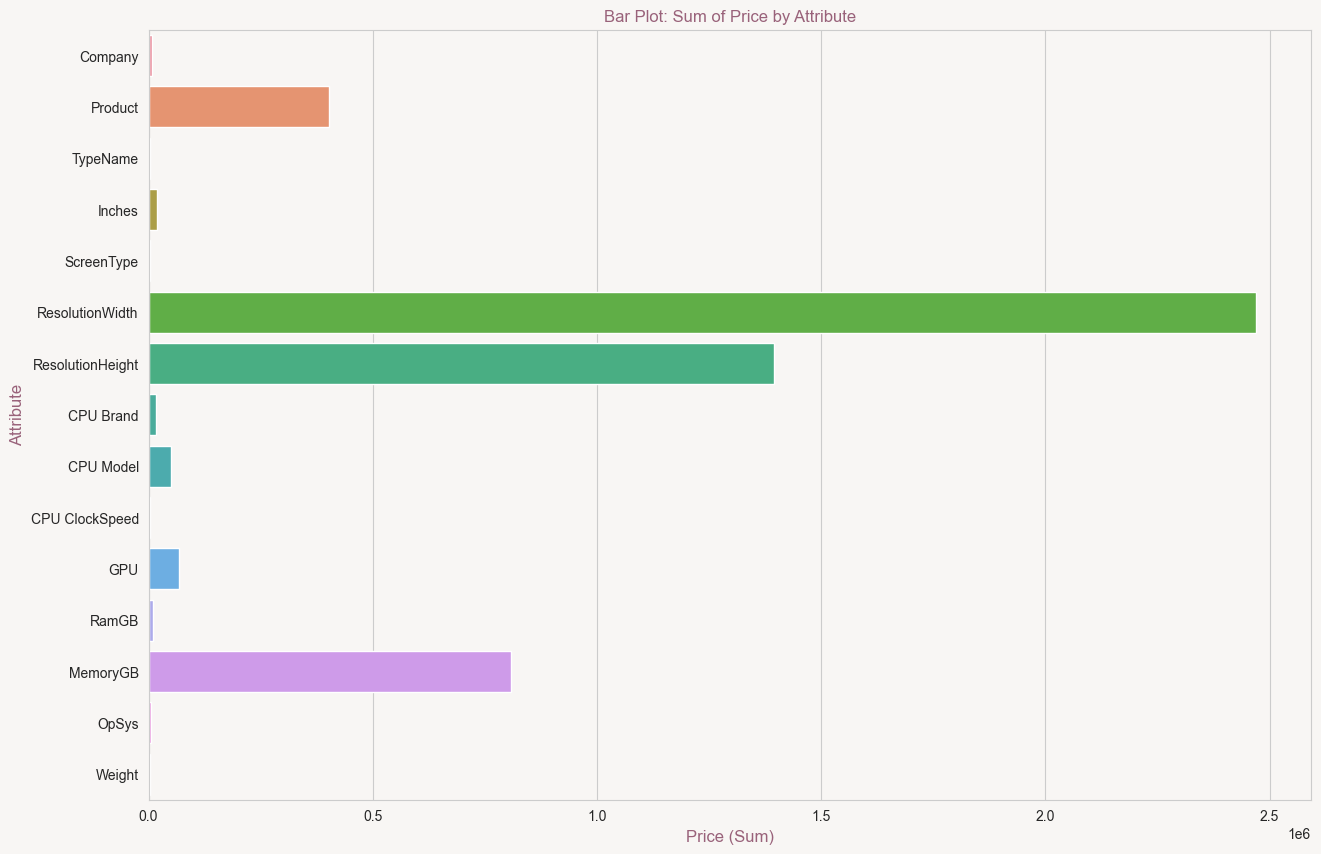

In [270]:
data = {
    'Attribute': ['Company', 'Product', 'TypeName', 'Inches', 'ScreenType', 'ResolutionWidth', 'ResolutionHeight',
               'CPU Brand', 'CPU Model', 'CPU ClockSpeed', 'GPU', 'RamGB', 'MemoryGB', 'OpSys', 'Weight'],
    'Price': [df[column].sum() for column in df.columns if column != 'PriceEuros']
}

df_bar = pd.DataFrame(data)

sns.set_style("whitegrid", {'axes.facecolor': '#F8F6F4'})

fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('#F8F6F4')
ax = sns.barplot(x='Price', y='Attribute', data=df_bar)

plt.title("Bar Plot: Sum of Price by Attribute", color="#99627A", fontsize=12)
ax.set_xlabel('Price (Sum)', color='#99627A', fontsize=12)
ax.set_ylabel('Attribute', color='#99627A', fontsize=12)

plt.show()

# Data Preprocessing :

In [68]:
df.head()

,Company,Product,TypeName,Inches,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed,GPU,RamGB,MemoryGB,OpSys,Weight,PriceEuros
0,1,300,4,13.3,4,2560,1600,13,41,2.3,56,8,128,8,1.37,1339.69
1,1,301,4,13.3,9,1440,900,13,41,1.8,50,8,128,8,1.34,898.94
2,7,50,3,15.6,0,1920,1080,13,41,2.5,52,8,256,4,1.86,575.00
3,1,300,4,15.4,4,2880,1800,13,42,2.7,8,16,512,8,1.83,2537.45
4,1,300,4,13.3,4,2560,1600,13,41,3.1,57,8,256,8,1.37,1803.60


#### Separate X,Y

In [69]:
x = df.drop('PriceEuros', axis=1)
y = df[['PriceEuros']]

In [70]:
x.head()

,Company,Product,TypeName,Inches,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed,GPU,RamGB,MemoryGB,OpSys,Weight
0,1,300,4,13.3,4,2560,1600,13,41,2.3,56,8,128,8,1.37
1,1,301,4,13.3,9,1440,900,13,41,1.8,50,8,128,8,1.34
2,7,50,3,15.6,0,1920,1080,13,41,2.5,52,8,256,4,1.86
3,1,300,4,15.4,4,2880,1800,13,42,2.7,8,16,512,8,1.83
4,1,300,4,13.3,4,2560,1600,13,41,3.1,57,8,256,8,1.37


In [71]:
y.head()

,PriceEuros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [72]:
x.shape

(1303, 15)

In [73]:
y.shape

(1303, 1)

#### Train & Test Data

In [74]:
from sklearn.model_selection import train_test_split as tts

In [75]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [76]:
xtrain.head()

,Company,Product,TypeName,Inches,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed,GPU,RamGB,MemoryGB,OpSys,Weight
1158,10,81,3,15.6,0,1920,1080,13,41,2.3,20,8,1024,5,2.50
904,10,471,3,15.6,2,1920,1080,13,41,2.5,52,8,512,5,1.95
439,2,538,3,15.6,0,1920,1080,13,41,2.5,52,4,256,2,2.00
581,4,281,3,15.6,9,1366,768,13,41,2.6,52,8,500,5,1.90
676,2,611,4,14.0,0,1920,1080,13,41,2.5,52,8,256,5,1.10


In [77]:
ytrain.head()

,PriceEuros
1158,788.49
904,1962.99
439,559.00
581,1008.52
676,1135.00


In [78]:
xtrain.shape

(912, 15)

In [80]:
xtest.shape

(391, 15)

In [81]:
ytrain.shape

(912, 1)

In [82]:
ytest.shape

(391, 1)

## Decision Tree Regressor

In [83]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [84]:
dt.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [85]:
dt_pred = dt.predict(xtest)
dt_pred

array([ 999.  , 1624.  ,  549.  ,  899.  , 1099.99, 1499.  ,  689.  ,
        459.  , 1348.48,  297.  , 2099.  ,  549.  , 1899.  ,  805.99,
       1499.  ,  879.  , 1323.  , 1350.  ,  598.  , 1950.  , 1799.  ,
        720.32, 1690.  ,  509.  , 1096.16, 1096.16,  742.  ,  742.  ,
       1499.  ,  945.  ,  459.  , 1750.  , 1690.  ,  817.95,  860.  ,
        689.  ,  709.  ,  499.  , 1169.  ,  229.  , 1340.  ,  549.  ,
        799.  , 2150.  ,  490.  ,  945.  , 1468.  ,  209.  ,  836.  ,
       1499.  , 1799.  ,  579.  ,  629.  , 1099.99,  559.  , 1518.55,
        209.  ,  800.  , 1419.  ,  899.  , 2250.68,  689.  ,  450.  ,
        639.  ,  259.  , 1499.  ,  650.  ,  817.95,  985.  , 3890.  ,
       3890.  ,  799.  ,  572.  ,  955.  ,  339.  ,  478.  ,  779.  ,
       1778.  , 1199.  , 1599.  ,  891.  ,  485.  ,  509.  ,  799.  ,
        249.  , 2774.63,  409.  , 2419.  , 1017.  , 1046.44, 1262.4 ,
       3588.8 , 1017.  ,  714.5 ,  836.  ,  451.  ,  836.  , 1099.  ,
        638.99, 1010

##### Accuracy, MSE, MAE for Decision Tree

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [99]:
dt_acc = r2_score(ytest, dt_pred)
print("Accuracy Without Sampling DT :", dt_acc)

Accuracy Without Sampling DT : 0.7347913302835725


In [100]:
dt_mse = mean_squared_error(ytest, dt_pred)
print("MSE:", dt_mse)

MSE: 142013.9048690537


In [101]:
dt_mae = mean_absolute_error(ytest, dt_pred)
print("MAE:", dt_mae)

MAE: 225.93677749360614


## KNN Regressor

In [103]:
from sklearn.neighbors import KNeighborsRegressor
ne = KNeighborsRegressor()

In [104]:
ne.fit(xtrain, ytrain)

KNeighborsRegressor()

In [105]:
knn_pred = ne.predict(xtest)
knn_pred

array([[1409.2  ],
       [1368.   ],
       [ 477.4  ],
       [ 766.6  ],
       [1220.2  ],
       [ 979.8  ],
       [1129.1  ],
       [ 750.2  ],
       [1300.6  ],
       [ 604.398],
       [2232.   ],
       [ 599.6  ],
       [1369.4  ],
       [ 665.834],
       [1786.   ],
       [1515.   ],
       [1670.394],
       [ 703.124],
       [ 473.192],
       [1462.2  ],
       [1521.506],
       [ 496.528],
       [ 892.98 ],
       [ 429.6  ],
       [1282.202],
       [ 953.   ],
       [ 793.13 ],
       [ 793.13 ],
       [1455.6  ],
       [1553.4  ],
       [ 473.192],
       [1246.2  ],
       [1338.2  ],
       [1529.   ],
       [1346.8  ],
       [ 998.4  ],
       [ 692.2  ],
       [ 655.754],
       [1230.82 ],
       [ 353.8  ],
       [1210.88 ],
       [1432.16 ],
       [ 471.15 ],
       [1181.298],
       [ 496.4  ],
       [1553.4  ],
       [1611.98 ],
       [ 263.18 ],
       [ 833.18 ],
       [1525.18 ],
       [1752.6  ],
       [1166.162],
       [1066

##### Accuracy, MSE, MAE for KNN Regressor 

In [106]:
knn_acc = r2_score(ytest, knn_pred)
print("Accuracy Without Sampling KNN :", knn_acc)

Accuracy Without Sampling KNN : 0.5158057593284184


In [107]:
knn_mse = mean_squared_error(ytest, knn_pred)
print("MSE:", knn_mse)

MSE: 259276.27066792842


In [108]:
knn_mae = mean_absolute_error(ytest, knn_pred)
print("MAE:", knn_mae)

MAE: 310.25950895140664


## Linear Regression :

In [109]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()

In [110]:
ln.fit(xtrain,ytrain)

LinearRegression()

In [112]:
ln_pred = ln.predict(xtest)
ln_pred

array([[1317.28790375],
       [1277.84406738],
       [ 641.00960735],
       [1298.02723607],
       [ 768.66930132],
       [1056.64429422],
       [ 998.779045  ],
       [ 694.87349909],
       [1192.5641726 ],
       [ 179.96440537],
       [2516.45764799],
       [ 879.90656452],
       [1354.54986211],
       [ 618.50059947],
       [1734.57634275],
       [1117.08075526],
       [1697.70909066],
       [1220.96715804],
       [1272.77370169],
       [1951.39809917],
       [1990.37376891],
       [ 750.30263243],
       [1184.64872174],
       [ 669.55912667],
       [1069.09648037],
       [1091.19725244],
       [ 658.54449582],
       [ 632.40941472],
       [1165.62437137],
       [1156.68750964],
       [ 754.85391883],
       [1351.89871197],
       [1246.12588189],
       [1128.39348498],
       [1264.99292363],
       [ 988.10934752],
       [1126.5439858 ],
       [ 572.02014236],
       [1206.14100962],
       [ -79.70489827],
       [1735.55427049],
       [ 921.880

##### Accuracy, MSE, MAE for Linear Regression

In [117]:
ln_acc = r2_score(ytest, ln_pred)
print("Accuracy Without Sampling LR :", ln_acc)

Accuracy Without Sampling LR : 0.6938044886496748


In [126]:
ln_mse = mean_squared_error(ytest, ln_pred)
print("MSE:", ln_mse)

MSE: 163961.53363587742


In [120]:
ln_mae = mean_absolute_error(ytest, ln_pred)
print("MAE:", ln_mae)

MAE: 288.5058849683219


## Random Forest :

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rf = RandomForestRegressor()

In [129]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [130]:
rf_pred = rf.predict(xtest)
rf_pred

array([1328.83      , 1379.9766    ,  544.6572    ,  927.1791    ,
       1304.7809    , 1552.0542    ,  771.113     ,  485.6293    ,
       1292.2372    ,  340.5196    , 2221.1194    ,  741.616     ,
       1725.8312    ,  747.8977    , 1731.606     , 1149.7108    ,
       1371.02      , 1102.03336667,  776.2808    , 1927.7121    ,
       2500.3006    ,  722.1861    , 1196.425     ,  466.618775  ,
       1098.1056    , 1085.755     ,  617.8973    ,  611.7773    ,
       1577.2761    ,  989.3414    ,  460.4311    , 1642.4161    ,
       1570.7781    , 1153.4836    ,  967.581     ,  773.2496    ,
        738.309     ,  482.4371    , 1285.8782    ,  257.7629    ,
       1469.6098    ,  669.7029    ,  845.0148    , 2260.6968    ,
        587.3058    , 1079.7141    , 1803.2974    ,  233.743     ,
        894.3566    , 1446.794     , 1730.9998    ,  537.6271    ,
        931.8927    , 1172.7272    ,  635.3639    , 1204.7691    ,
        233.325     ,  969.7867    , 1195.8818    ,  927.1791 

##### Accuracy, MSE, MAE for Random Forest Regressor

In [133]:
rf_acc = r2_score(ytest, rf_pred)
rf_mse = mean_squared_error(ytest, rf_pred)
rf_mae = mean_absolute_error(ytest, rf_pred)

print("Random Forest Regressor Accuracy :", rfc_acc)
print("Random Forest Regressor MSE:", rf_mse)
print("Random Forest Regressor MAE:", rf_mae)

Random Forest Regressor Accuracy : 0.8439329849347798
Random Forest Regressor MSE: 83570.74546004744
Random Forest Regressor MAE: 177.35408932570132


## Parameter Tuning : KNN, DT, Random Forest & Linear Regression

In [160]:
from sklearn.model_selection import RandomizedSearchCV

In [161]:
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression()
}

In [162]:
param_grids = {
    'Decision Tree': {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Linear Regression': {}
}

In [164]:
best_scores = {}
best_params = {}
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    random_search = RandomizedSearchCV(model, param_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5)
    random_search.fit(x, y)
    best_scores[model_name] = -random_search.best_score_
    best_params[model_name] = random_search.best_params_

In [165]:
for model_name, score in best_scores.items():
    params = best_params[model_name]
    print(f"{model_name}:")
    print(f"Best Score: {score}")
    print("Best Parameters:")
    for param, value in params.items():
        print(f"{param}: {value}")
    print("\n")

Decision Tree:
Best Score: 125327.22868956393
Best Parameters:
min_samples_split: 10
min_samples_leaf: 4
max_depth: None


KNN:
Best Score: 190552.4804877781
Best Parameters:
weights: distance
n_neighbors: 7


Random Forest:
Best Score: 83914.59467869152
Best Parameters:
n_estimators: 100
min_samples_split: 2
min_samples_leaf: 2
max_depth: None


Linear Regression:
Best Score: 151983.12327331133
Best Parameters:




### Class Distribution :

In [167]:
y.value_counts()

PriceEuros
1099.00       14
1499.00       14
1799.00       14
1199.00       11
499.00        11
              ..
849.90         1
850.66         1
854.00         1
855.00         1
6099.00        1
Name: count, Length: 791, dtype: int64

## Cross-Validation :

Types of Cross-Validation :
1. Hold Out Cross Validation
2. K-Fold Cross Validation
3. Leave One-Out Cross Validation (LOOCV)
4. Stratified K Fold Cross Validation

#### Hold Out Cross Validation :

In [173]:
from sklearn.model_selection import train_test_split as tts
HOCV_xtrain, HOCV_xtest, HOCV_ytrain, HOCV_ytest = tts(x, y, random_state=42)
HOCV_train, HOCV_test = tts(df,train_size=.8,random_state=50)

In [174]:
HOCV_train.head()

,Company,Product,TypeName,Inches,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed,GPU,RamGB,MemoryGB,OpSys,Weight,PriceEuros
1299,10,588,0,13.3,3,3200,1800,13,42,2.5,46,16,512,5,1.30,1499.00
127,2,103,3,14.0,9,1366,768,1,6,1.5,11,4,64,6,1.65,277.99
1188,4,576,4,13.3,7,3200,1800,13,41,2.4,46,8,256,2,1.23,1099.00
624,7,112,3,15.6,9,1366,768,13,41,2.3,46,4,500,7,1.88,932.00
925,4,277,3,15.6,9,1366,768,13,41,2.3,46,4,500,5,1.95,729.90


In [175]:
HOCV_test.head()

,Company,Product,TypeName,Inches,ScreenType,ResolutionWidth,ResolutionHeight,CPU Brand,CPU Model,CPU ClockSpeed,GPU,RamGB,MemoryGB,OpSys,Weight,PriceEuros
160,2,569,3,15.6,9,1366,768,0,22,3.0,21,4,1024,5,2.03,403.00
760,10,291,1,15.6,2,1920,1080,13,42,2.8,71,8,1152,5,2.50,1048.00
25,4,239,3,15.6,9,1366,768,13,40,2.0,46,4,1024,5,2.30,418.64
195,7,364,3,17.3,2,1920,1080,13,41,1.6,66,8,1024,5,2.50,914.00
1190,10,291,1,15.6,2,1920,1080,13,41,2.5,71,8,1024,5,2.40,819.00


Using Decision Tree :

In [176]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(HOCV_xtrain, HOCV_ytrain)

Accuracy1 = dt.score(HOCV_xtest, HOCV_ytest)
print("HOCV Accuracy With Sampling DT :", Accuracy1)

HOCV Accuracy With Sampling DT : 0.716845667805968


Using KNN :

In [177]:
from sklearn.neighbors import KNeighborsRegressor
ne = KNeighborsRegressor()

ne.fit(HOCV_xtrain, HOCV_ytrain)

Accuracy2 = ne.score(HOCV_xtest, HOCV_ytest)
print("HOCV Accuracy With Sampling KNN :", Accuracy2)

HOCV Accuracy With Sampling KNN : 0.5280802934616209


#### K-Fold Cross Validation :

In [178]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate
kfold = KFold(n_splits=4)

Using Decision Tree :

In [180]:
Accuracy3 = cross_val_score(dt, x, y, cv=kfold)
print("KFCV Accuracy With Sampling DT :", Accuracy3)

KFCV Accuracy With Sampling DT : [0.7113657  0.73792325 0.4878981  0.64305773]


In [181]:
Accuracy3.mean()

0.6450611933466499

Using KNN :

In [182]:
Accuracy4 = cross_val_score(dt, x, y, cv=kfold)
print("KFCV Accuracy With Sampling KNN :", Accuracy4)

KFCV Accuracy With Sampling KNN : [0.68191814 0.74947108 0.47253816 0.66519152]


In [183]:
Accuracy4.mean()

0.6422797235734972

#### Time Series Split :

In [188]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

Using Decision Tree :

In [223]:
dt_scores = []
for train_index, test_index in tscv.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    score = r2_score(y_test, y_pred)
    dt_scores.append(score)

average_dt_score = sum(dt_scores) / len(dt_scores)
print(f"Time Series Split Accuracy with DT: {average_dt_score:.4f}")

Time Series Split Accuracy with DT: 0.6162


Using KNN :

In [228]:
tscv = TimeSeriesSplit(n_splits=n_splits)
knn_scores = []
for train_index, test_index in tscv.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    score = r2_score(y_test, y_pred)
    knn_scores.append(score)

average_knn_score = sum(knn_scores) / len(knn_scores)
print(f"Time Series Split Accuracy with kNN: {average_knn_score:.4f}")

Time Series Split Accuracy with kNN: 0.4823


# Feature Engineering or Selection :

In [232]:
from sklearn.feature_selection import SelectKBest, f_regression

In [233]:
selector = SelectKBest(f_regression, k=5)
X_new = selector.fit_transform(x, y)

In [234]:
feature_indices = selector.get_support(indices=True)
selected_features = x.columns[feature_indices]

In [238]:
print("Selected Features:\n")
for feature in selected_features:
    print(feature)

Selected Features:

ResolutionWidth
ResolutionHeight
CPU ClockSpeed
GPU
RamGB


# Feature Scaling :

In [239]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(x)

min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(x)

print("Standardized Features:")
print(X_standardized)

print("\nNormalized Features:")
print(X_normalized)

Standardized Features:
[[-1.33318893 -0.04776583  1.13877867 ... -1.02616174  3.08361617
  -1.00528323]
 [-1.33318893 -0.04194585  1.13877867 ... -1.02616174  3.08361617
  -1.05038114]
 [ 0.13647704 -1.50276112  0.33540639 ... -0.75924446 -0.78165739
  -0.26868391]
 ...
 [ 0.87131003 -0.65304387  0.33540639 ... -1.15962038  0.184661
  -0.80985892]
 [ 0.13647704 -1.78212022  0.33540639 ...  0.84225922  0.184661
   0.22739318]
 [-1.0882446   1.51198912  0.33540639 ... -0.2504334   0.184661
   0.24242582]]

Normalized Features:
[[0.05555556 0.48622366 0.8        ... 0.04702194 1.         0.16957606]
 [0.05555556 0.48784441 0.8        ... 0.04702194 1.         0.16209476]
 [0.38888889 0.08103728 0.6        ... 0.09717868 0.5        0.29177057]
 ...
 [0.55555556 0.31766613 0.6        ... 0.02194357 0.625      0.20199501]
 [0.38888889 0.00324149 0.6        ... 0.39811912 0.625      0.37406484]
 [0.11111111 0.92058347 0.6        ... 0.19278997 0.625      0.3765586 ]]


# Naive Bayes :

In [245]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [246]:
X_pca = pca.fit_transform(X_standardized)

In [248]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [249]:
df_pca['PriceEuros'] = y

In [250]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.24142515 0.1707485  0.10794231 0.08045739 0.06739254 0.05736427
 0.05164423 0.04880798 0.0454075  0.03969104]


In [251]:
print("\nData after Dimensionality Reduction (PCA):")
print(df_pca.head())


Data after Dimensionality Reduction (PCA):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.419906  2.853775  0.716867 -0.846437 -2.365551  0.166472 -1.149968   
1 -1.782147  1.150374 -1.250495 -0.884129 -2.028366  1.008269 -1.131529   
2  0.122940 -0.109128 -0.042602 -0.069333  0.329238 -1.950609 -0.003709   
3  1.693525  1.964173  2.048919 -1.350950 -2.970594 -0.064800 -0.555231   
4  0.977740  2.636132  0.741169 -1.479706 -2.264776  0.073236 -1.310141   

        PC8       PC9      PC10  PriceEuros  
0 -1.964118 -1.026432  0.161096     1339.69  
1 -2.442300 -1.006987  0.043920      898.94  
2  0.355300 -0.546044  0.269217      575.00  
3 -2.079309  0.432317 -1.362432     2537.45  
4 -1.538579 -1.523815 -0.854550     1803.60  


# Support Vector Machine (SVM) :

In [254]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf')

In [255]:
svm.fit(xtrain, ytrain)

SVR()

In [257]:
svm_pred = svm.predict(xtest)

In [260]:
svm_accuracy = r2_score(ytest, svm_pred)
mse = mean_squared_error(ytest, svm_pred)
mae = mean_absolute_error(ytest, svm_pred)

print("SVM Accuracy :", svm_accuracy)
print("Mean Squared Error :", mse)
print("Mean Absolute Error :", mae)

SVM Accuracy : -0.030282486720986324
Mean Squared Error : 551695.535496226
Mean Absolute Error : 514.3773779991933


# Compare All Accuracy :

In [264]:
accuracy_data = {
    'Algorithm': ['Decision Tree Regressor Accuracy', 'KNN Regressor Accuracy', 'Random Forest Regressor Accuracy', 'Linear Regression Accuracy',
                  'Hold Out Cross Validation Accuracy With DT', 'Hold Out Cross Validation Accuracy With KNN', 
                  'K-Fold Cross Validation Accuracy DT', 'K-Fold Cross Validation Accuracy With KNN',
                  'Time Series Split Accuracy with DT', 'Time Series Split Accuracy with KNN', 'Support Vector Machine (SVM) Accuracy'],
    'Accuracy': [dt_acc, knn_acc, rfc_acc, ln_acc, Accuracy1, Accuracy2, Accuracy3.mean(), Accuracy4.mean(), average_dt_score, average_knn_score, svm_accuracy]
}

result_df = pd.DataFrame(accuracy_data)
result_df

,Algorithm,Accuracy
0,Decision Tree Regressor Accuracy,0.734791
1,KNN Regressor Accuracy,0.515806
2,Random Forest Regressor Accuracy,0.843933
3,Linear Regression Accuracy,0.693804
4,Hold Out Cross Validation Accuracy With DT,0.716846
5,Hold Out Cross Validation Accuracy With KNN,0.528080
6,K-Fold Cross Validation Accuracy DT,0.645061
7,K-Fold Cross Validation Accuracy With KNN,0.642280
8,Time Series Split Accuracy with DT,0.616156
9,Time Series Split Accuracy with KNN,0.482315


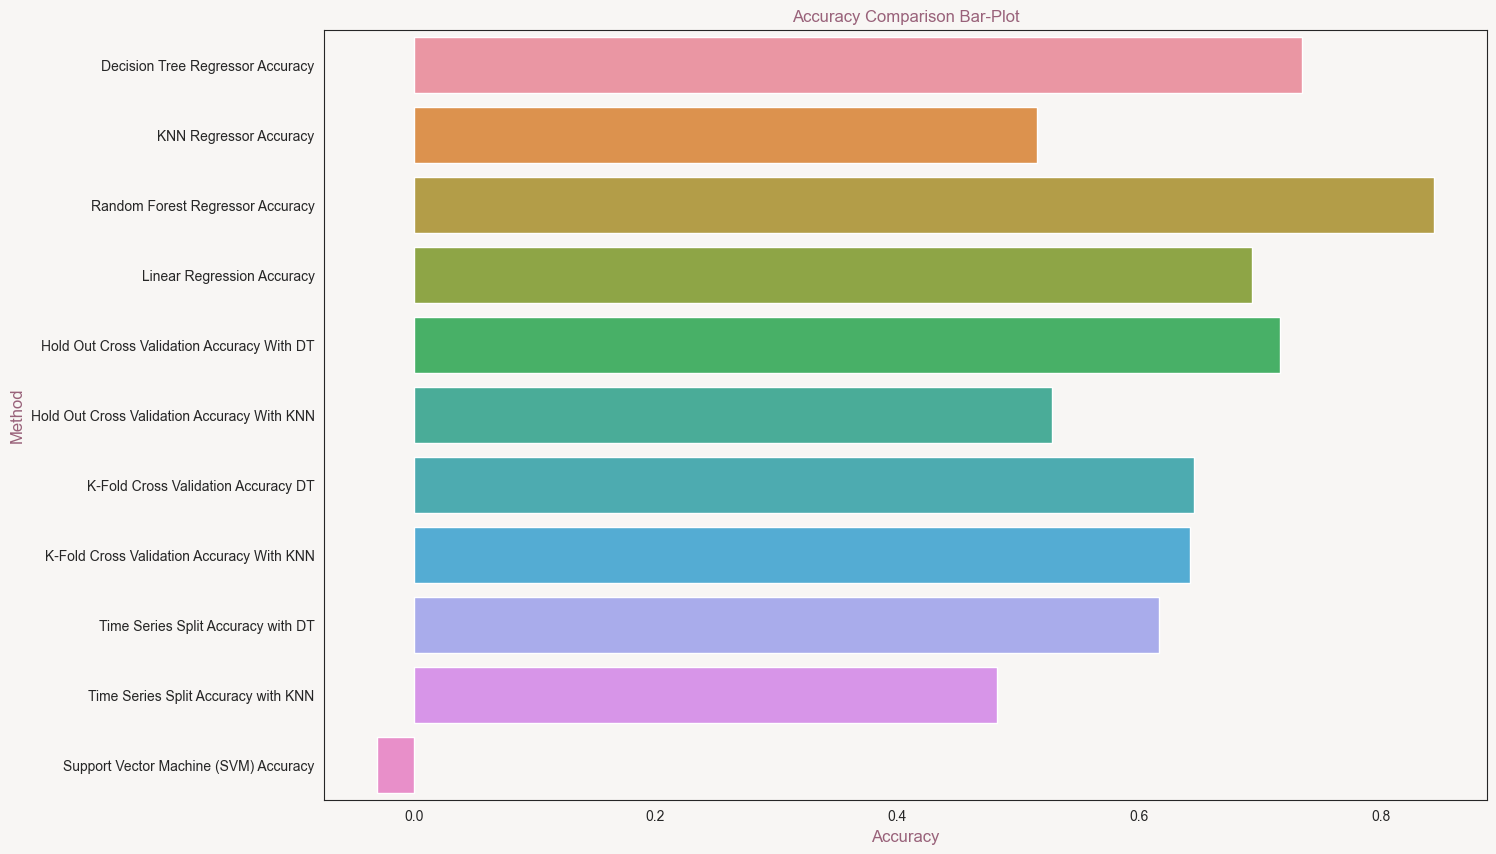

In [265]:
sns.set_style("white", {'axes.facecolor': '#F8F6F4'})
sns.set_palette(['#870A30','#DB1F48','#643A6B', '#FFAEBC', '#A0E7E5', '#B4F8C8', '#AAD6A0', '#FBE7C6', '#FFA384'])

fig = plt.figure(figsize=(15, 10))
fig.set_facecolor('#F8F6F4')

ax = sns.barplot(x='Accuracy', y='Algorithm', data=result_df)

plt.title("Accuracy Comparison Bar-Plot", color="#99627A", fontsize=12)
ax.set_xlabel('Accuracy', color='#99627A', fontsize=12)
ax.set_ylabel('Method', color='#99627A', fontsize=12)

plt.show()

# Deployment using Gradio:

In [272]:
!pip install gradio

In [273]:
import gradio as gr

In [274]:
def predict_price(company, product, typename, inches, screentype, resolutionwidth, resolutionheight,
                  cpubrand, cpumodel, cpuclockspeed, gpu, ramgb, memorygb, opsys, weight):
    input_data = pd.DataFrame([[company, product, typename, inches, screentype, resolutionwidth, resolutionheight,
                                cpubrand, cpumodel, cpuclockspeed, gpu, ramgb, memorygb, opsys, weight]],
                              columns=x.columns)
    prediction = ln.predict(input_data)
    return prediction[0]

In [276]:
inputs = [
    gr.inputs.Dropdown(choices=df['Company'].unique().tolist(), label="Company"),
    gr.inputs.Dropdown(choices=df['Product'].unique().tolist(), label="Product"),
    gr.inputs.Dropdown(choices=df['TypeName'].unique().tolist(), label="TypeName"),
    gr.inputs.Number(label="Inches"),
    gr.inputs.Dropdown(choices=df['ScreenType'].unique().tolist(), label="ScreenType"),
    gr.inputs.Number(label="ResolutionWidth"),
    gr.inputs.Number(label="ResolutionHeight"),
    gr.inputs.Dropdown(choices=df['CPU Brand'].unique().tolist(), label="CPU Brand"),
    gr.inputs.Dropdown(choices=df['CPU Model'].unique().tolist(), label="CPU Model"),
    gr.inputs.Number(label="CPU ClockSpeed"),
    gr.inputs.Dropdown(choices=df['GPU'].unique().tolist(), label="GPU"),
    gr.inputs.Number(label="RamGB"),
    gr.inputs.Number(label="MemoryGB"),
    gr.inputs.Dropdown(choices=df['OpSys'].unique().tolist(), label="OpSys"),
    gr.inputs.Number(label="Weight")
]

In [277]:
output = gr.outputs.Textbox(label="PriceEuros")

In [278]:
interface = gr.Interface(fn=predict_price, inputs=inputs, outputs=output, title="Price Prediction")
interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


##### THE END!